A: кабины на верхних палубах, ближе к носу судна.  
B: также кабины на верхних палубах, но расположены немного ниже, обычно ближе к центру судна.  
C: кабины на центральных палубах, вблизи ресторанов и общественных помещений.  
D: кабины на средних палубах, обычно ближе к корме судна.  
E: кабины на нижних палубах, но все еще находятся выше ватерлинии.  
F и G: кабины на самых нижних палубах, ближе к воде.  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency 

import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

Missing values in training data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values in test data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


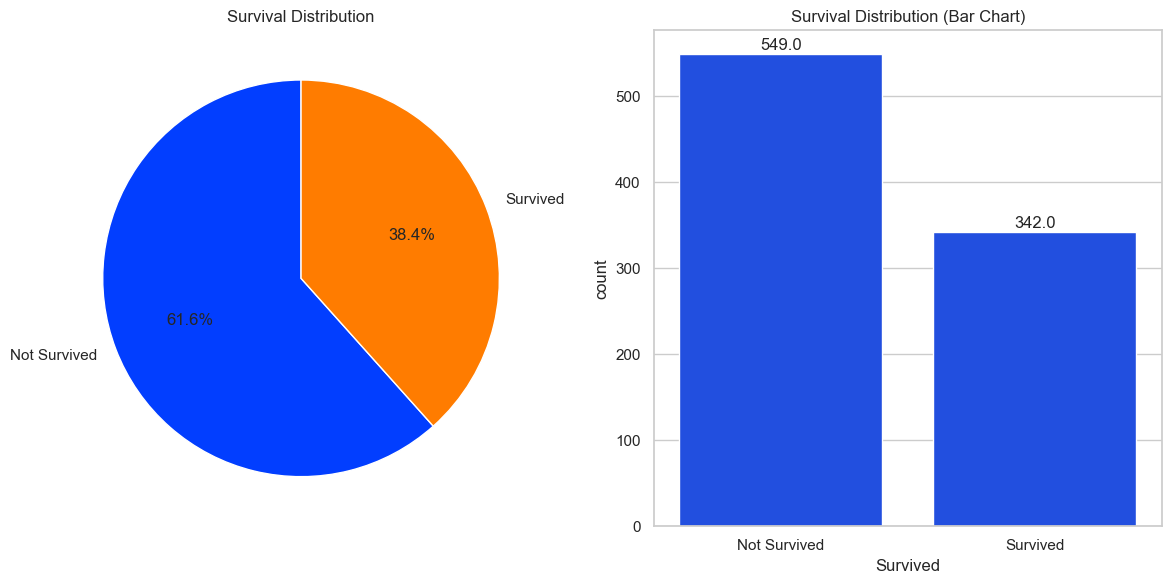

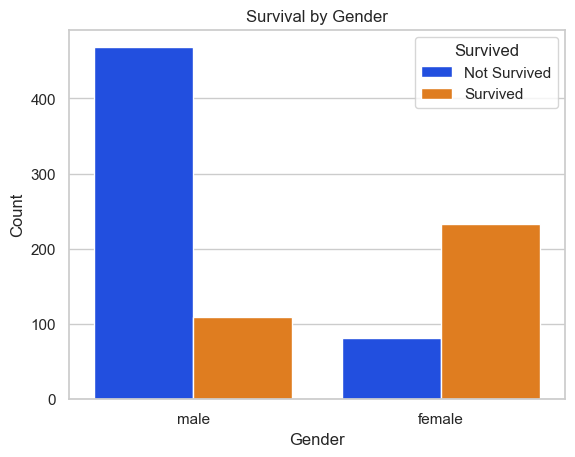

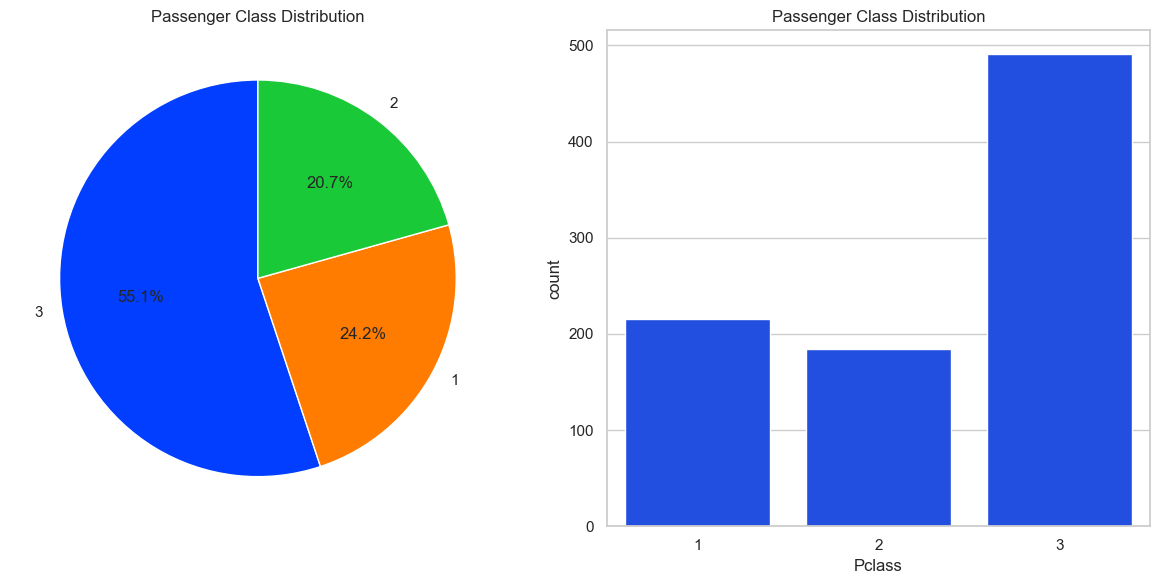

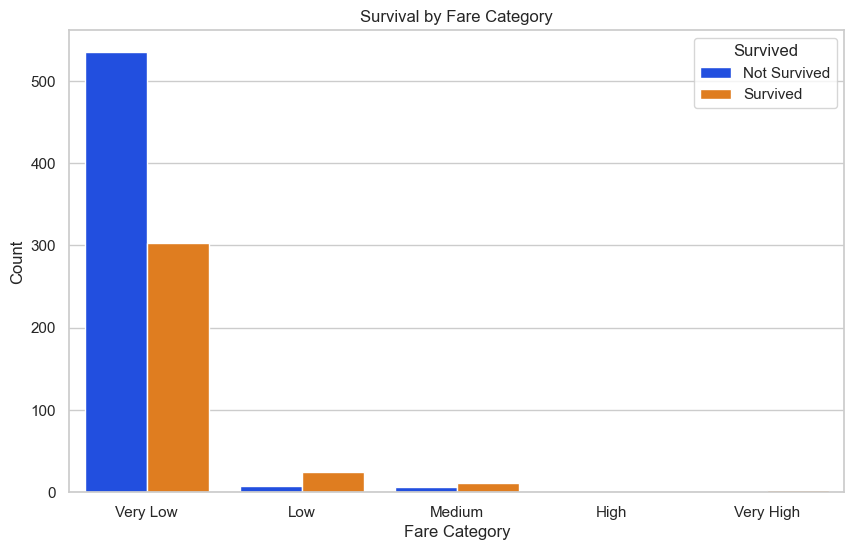

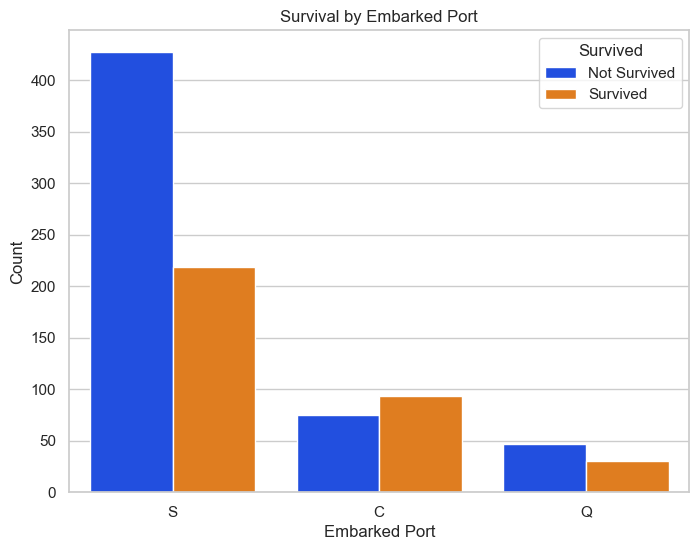

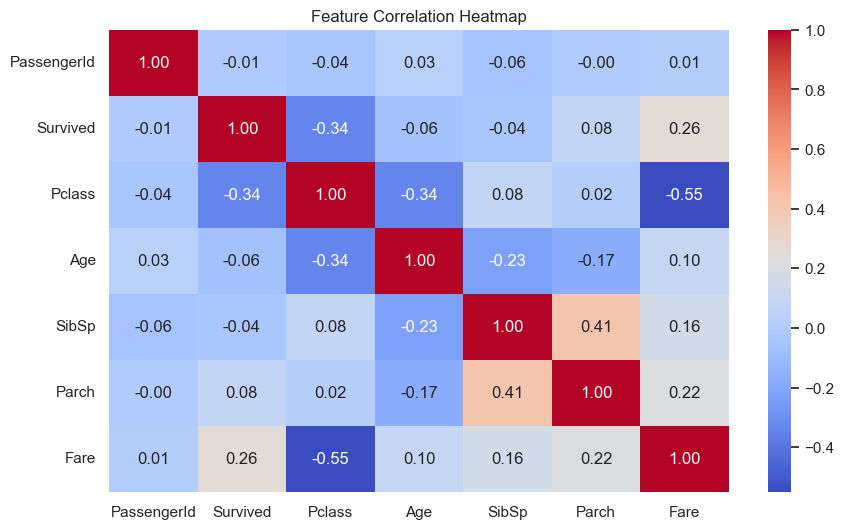

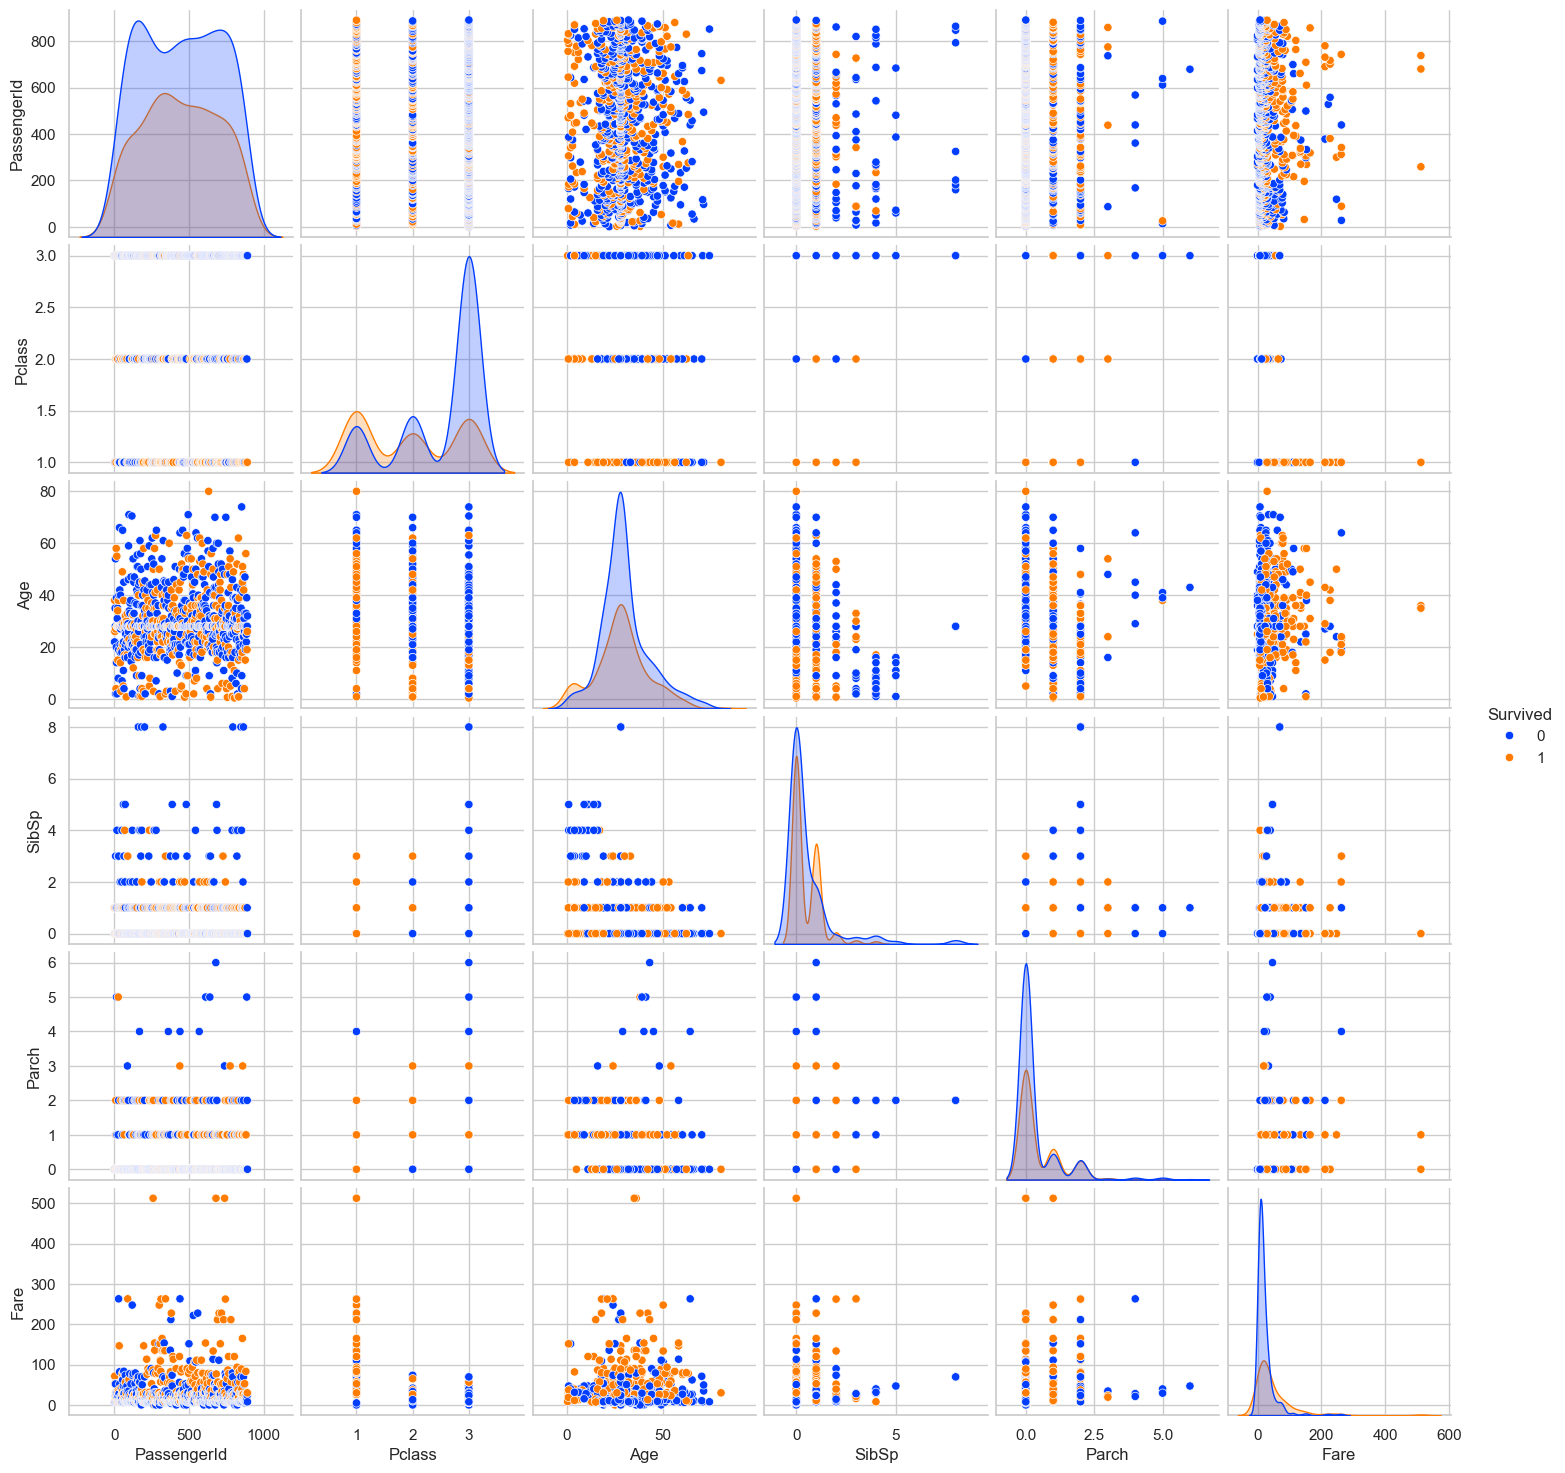

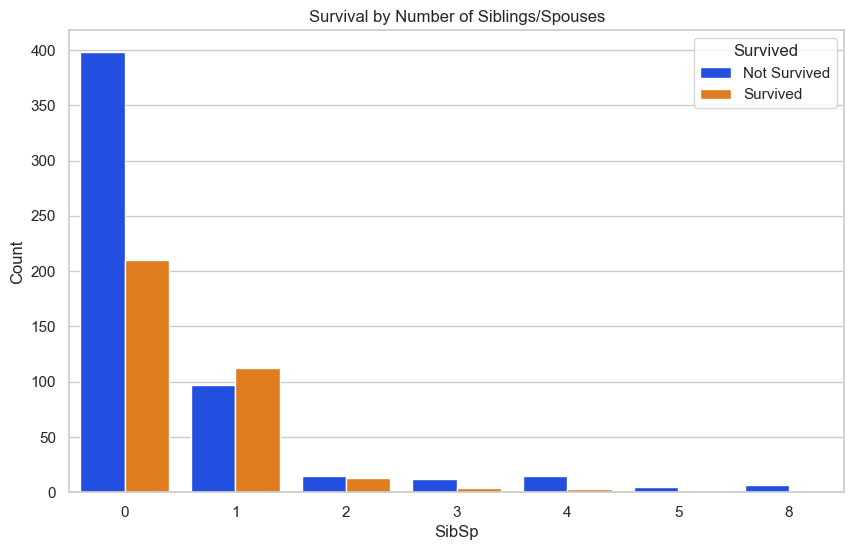

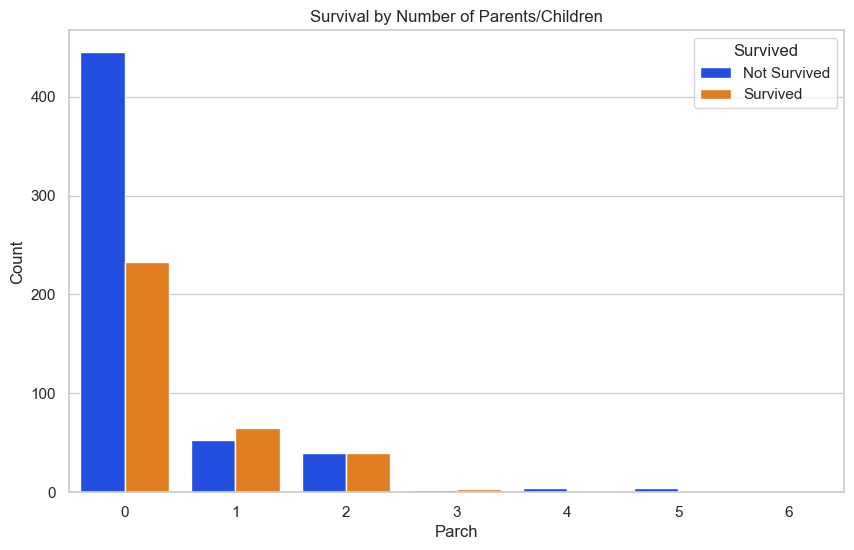

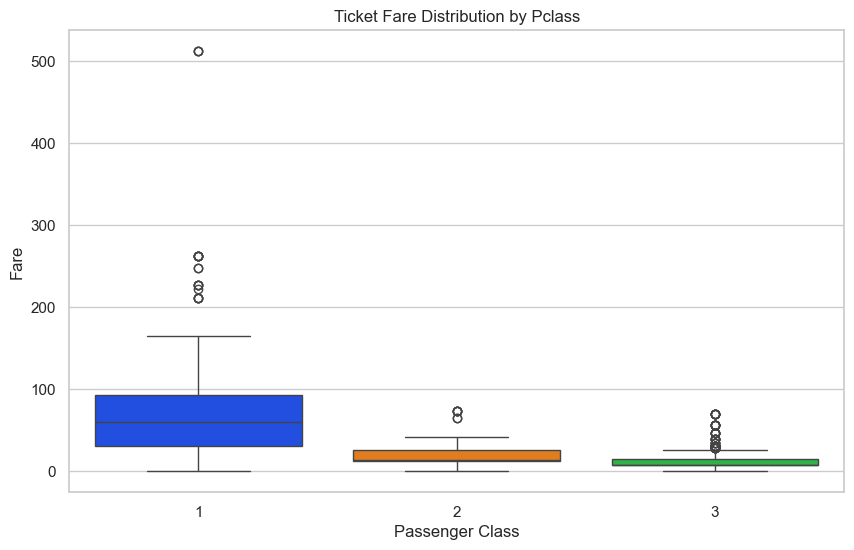

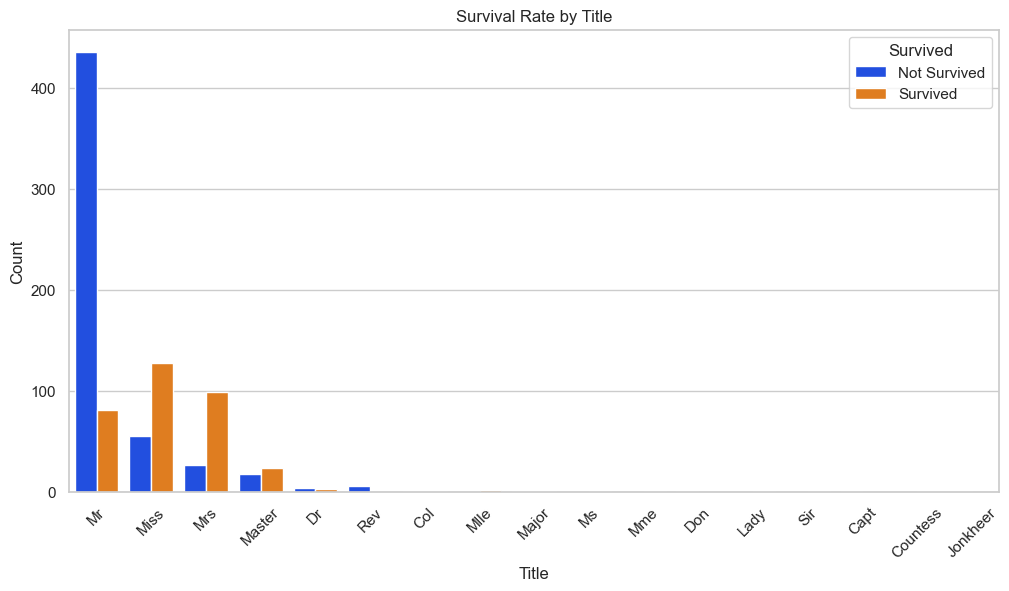

In [2]:
# Load data
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

# Check missing values
print("Missing values in training data:")
print(train_data.isnull().sum())

print("Missing values in test data:")
print(test_data.isnull().sum())

# Fill missing values for 'Age' and 'Fare'
train_data['Age'].fillna(value=train_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(value=train_data['Fare'].median(), inplace=True)
test_data['Age'].fillna(value=test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(value=test_data['Fare'].median(), inplace=True)

# Fill missing values for 'Embarked' with the most common value in the training data
train_data['Embarked'].fillna(value=train_data['Embarked'].mode()[0], inplace=True)

# Combine train and test data for consistent preprocessing (without 'Survived' column in test data)
test_data['Survived'] = -1  # Placeholder for test data
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Filter out test data (since it has 'Survived' as -1)
combined_data_filtered = combined_data[combined_data['Survived'] != -1]

# Set visualization style
plt.rcParams.update({'font.size': 12})
sns.set_theme(style='whitegrid', palette='bright')

# Survival distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
survived_counts = train_data['Survived'].value_counts()

# Pie chart
axes[0].pie(survived_counts, labels=['Not Survived', 'Survived'], startangle=90, autopct='%1.1f%%')
axes[0].set_title('Survival Distribution')

# Bar chart
sns.countplot(data=train_data, x='Survived', ax=axes[1])
axes[1].set_xticklabels(['Not Survived', 'Survived'])

# Annotate bar chart
for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width() / 2, p.get_height() + 5, f'{p.get_height()}', ha='center')

axes[1].set_title('Survival Distribution (Bar Chart)')
plt.tight_layout()
plt.show()

# Survival by gender
sns.countplot(data=combined_data_filtered, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

# Passenger class distribution
class_counts = combined_data_filtered['Pclass'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Passenger Class Distribution')

# Bar chart
sns.countplot(data=combined_data_filtered, x='Pclass', ax=axes[1])
axes[1].set_title('Passenger Class Distribution')

plt.tight_layout()
plt.show()

# Survival by fare category
combined_data_filtered['Fare_Category'] = pd.cut(combined_data_filtered['Fare'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data_filtered, x='Fare_Category', hue='Survived', palette='bright')
plt.title('Survival by Fare Category')
plt.xlabel('Fare Category')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

# Survival by embarkation port
plt.figure(figsize=(8, 6))
sns.countplot(data=combined_data_filtered, x='Embarked', hue='Survived', palette='bright')
plt.title('Survival by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

# Exclude non-numeric columns
numeric_cols = train_data.select_dtypes(include=['number']).columns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplot for numerical features
numeric_data = combined_data_filtered.select_dtypes(include=['number'])  # Select only numeric columns
sns.pairplot(numeric_data, hue='Survived', palette='bright')
plt.show()

# Survival by number of siblings/spouses
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data_filtered, x='SibSp', hue='Survived', palette='bright')
plt.title('Survival by Number of Siblings/Spouses')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

# Survival by number of parents/children
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data_filtered, x='Parch', hue='Survived', palette='bright')
plt.title('Survival by Number of Parents/Children')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

# Additional graphs
# Distribution of Ticket Prices by Class
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data_filtered, x='Pclass', y='Fare', palette='bright')
plt.title('Ticket Fare Distribution by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

# Survival Rate by Title (Extracted from Name)
combined_data_filtered['Title'] = combined_data_filtered['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
title_order = combined_data_filtered['Title'].value_counts().index.tolist()
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_data_filtered, x='Title', hue='Survived', order=title_order, palette='bright')
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.xticks(rotation=45)
plt.show()


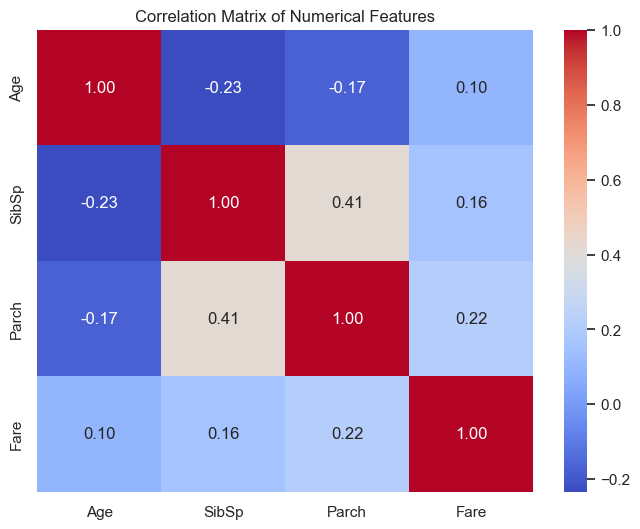

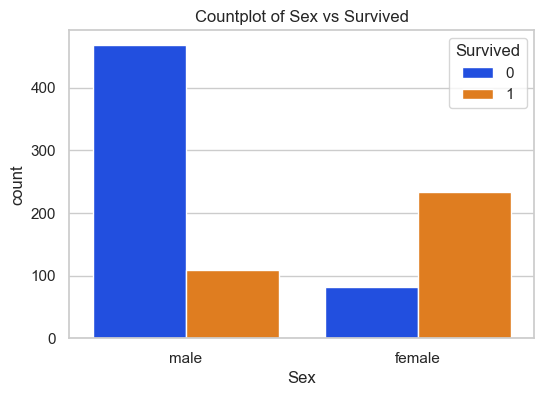

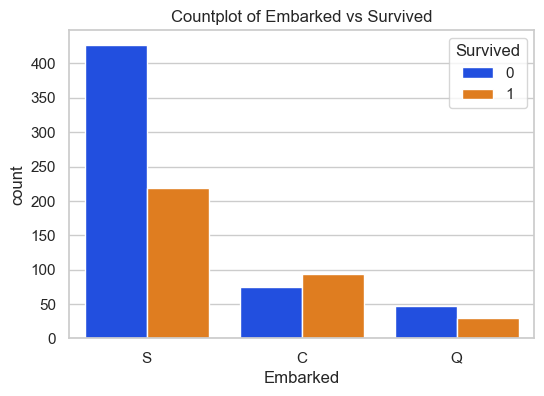


Correlation with 'Survived':
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

Chi-squared test for Sex: p-value = 1.1973570627755645e-58

Chi-squared test for Embarked: p-value = 2.3008626481449577e-06


In [3]:
# 1. Графическая проверка значимости для числовых признаков
# Строим корреляционную матрицу для числовых признаков
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = train_data[numerical_columns].corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# 2. Графическая проверка значимости для категориальных признаков
# Для категориальных признаков, например, Sex и Embarked, строим столбчатые диаграммы
categorical_columns = ['Sex', 'Embarked']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Survived', data=train_data)
    plt.title(f'Countplot of {col} vs Survived')
    plt.show()

# 3. Числовая проверка значимости (корреляция для числовых признаков и хи-квадрат для категориальных)
# Числовая корреляция с целевой переменной
correlations = train_data[numerical_columns + ['Survived']].corr()
print("\nCorrelation with 'Survived':")
print(correlations['Survived'])

# Применение теста Хи-квадрат для категориальных признаков
for col in categorical_columns:
    # Преобразуем категориальные данные в числовые для применения теста Хи-квадрат
    contingency_table = pd.crosstab(train_data[col], train_data['Survived'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"\nChi-squared test for {col}: p-value = {p_value}")

